## Project Overview
"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

- CustomerID : Id customer
- ProdTaken  : whether customer Taken or not Taken the product that offer (1:Taken, 0:Not Taken)
- Age	     : Age of Customer
- TypeofContact	: How customer was contacted (Company Invited or Self Inquiry)
- CityTier : City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
- DurationOfPitch : Duration of the pitch by a salesperson to the customer
- Occupation	: Occupation of cutomer
- Gender	    : Whether customer Male or Female
- NumberOfPersonVisiting : Number of Person who visiting
- NumberOfFollowups	: Number of 
- ProductPitched	
- PreferredPropertyStar	: Preferred hotel property rating by customer (3,4,5)
- MaritalStatus	: Marital status of customer
- NumberOfTrips	: Average number of trips in a year by customer
- Passport	: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore : Sales pitch satisfaction score	
- OwnCar : Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting	: Total number of children with age less than 5 planning to take the trip with the customer
- Designation : Designation of the customer in the current organization	
- MonthlyIncome : Gross monthly income of the customer

#### Import Package 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('data/Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## EDA

### Descriptive Statistics

#### Cek tipe data tiap kolom dengan `df.info()` dan cek missing value dari data dengan `df.isna()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

#### Statistical summary dengan `df.describe()`

Splitting Data menjadi Numeric dan Categorical berdasarkan tipe datanya untuk memudahkan analisis

In [6]:
cats = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
nums = ['ProdTaken','Age','MonthlyIncome','NumberOfChildrenVisiting', 'CityTier', 'PreferredPropertyStar','Passport','DurationOfPitch','NumberOfFollowups','NumberOfTrips','NumberOfPersonVisiting','PitchSatisfactionScore','OwnCar']

In [7]:
df[nums].describe()

,ProdTaken,Age,MonthlyIncome,NumberOfChildrenVisiting,CityTier,PreferredPropertyStar,Passport,DurationOfPitch,NumberOfFollowups,NumberOfTrips,NumberOfPersonVisiting,PitchSatisfactionScore,OwnCar
count,4888.000000,4662.000000,4655.000000,4822.000000,4888.000000,4862.000000,4888.000000,4637.000000,4843.000000,4748.000000,4888.000000,4888.000000,4888.000000
mean,0.188216,37.622265,23619.853491,1.187267,1.654255,3.581037,0.290917,15.490835,3.708445,3.236521,2.905074,3.078151,0.620295
std,0.390925,9.316387,5380.698361,0.857861,0.916583,0.798009,0.454232,8.519643,1.002509,1.849019,0.724891,1.365792,0.485363
min,0.000000,18.000000,1000.000000,0.000000,1.000000,3.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,31.000000,20346.000000,1.000000,1.000000,3.000000,0.000000,9.000000,3.000000,2.000000,2.000000,2.000000,0.000000
50%,0.000000,36.000000,22347.000000,1.000000,1.000000,3.000000,0.000000,13.000000,4.000000,3.000000,3.000000,3.000000,1.000000
75%,0.000000,44.000000,25571.000000,2.000000,3.000000,4.000000,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,1.000000
max,1.000000,61.000000,98678.000000,3.000000,3.000000,5.000000,1.000000,127.000000,6.000000,22.000000,5.000000,5.000000,1.000000


- rata-rata usia customer `37` tahun, usia termuda `18` dan usia paling tua `61` tahun
- rata-rata income dari customer `23619`, income terendah `1000` dan income tertinggi `98678`

In [8]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


- Kebanyakan dari customer approach ke Travel secara langsung, yaitu sebanyak `3444` dari total customer `4888`
- Customer didominasi oleh laki-laki yaitu sebanyak `2916` customer laki-laki
- Sebagain besar customer memiliki posisi `executive`, dan product yang dipilih customer sebagain besar adalah `Basic`, untuk selanjutnya bisa dilakukan analisis lebih lanjut

#### Value Counting

untuk mengetahui secara detail value dari data categorical, selanjutnya akan dilakukan pengecekan dengan menggunakan `value_counts()`

In [9]:
cats.extend(['ProdTaken', 'CityTier', 'PreferredPropertyStar','Passport','NumberOfTrips','PitchSatisfactionScore','OwnCar'])

In [10]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

Value count kolom ProdTaken:
0    3968
1     920
Name: ProdTaken, dtype: int64

Value count kolom CityTier:
1    3190
3    1500
2     

## Data Visualization

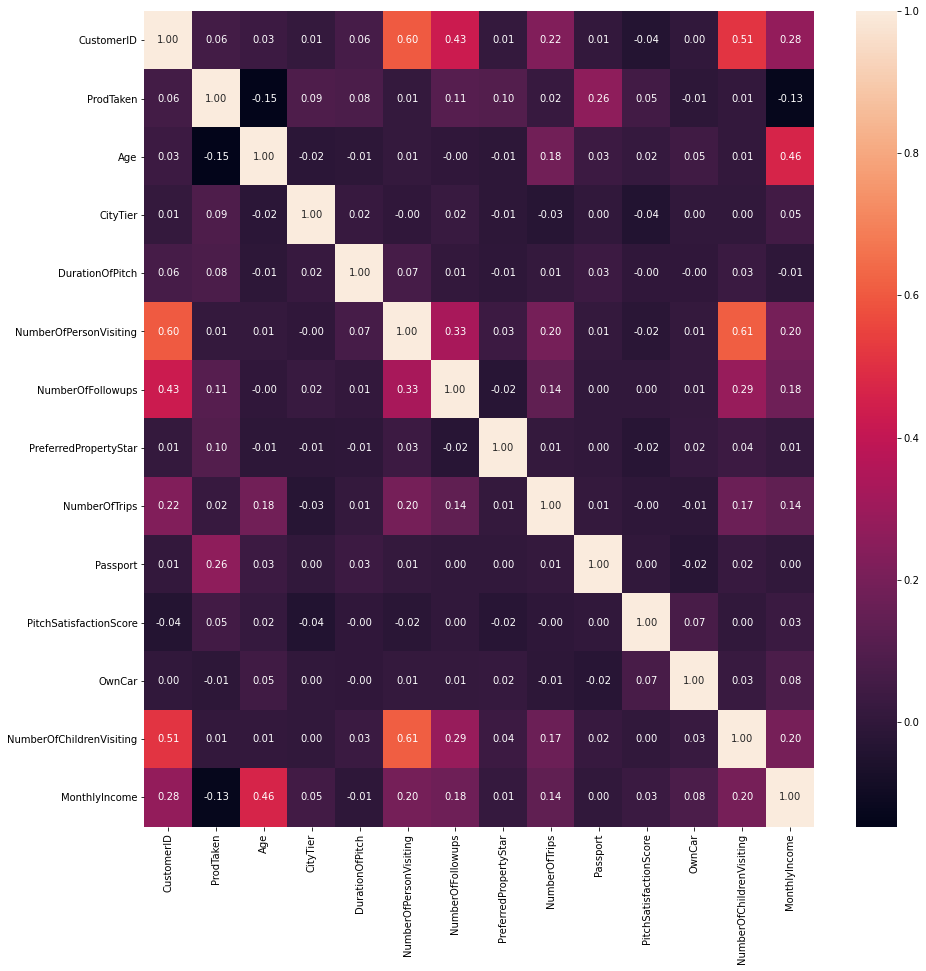

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

Text(0.5, 1.0, '% of Product Taken')

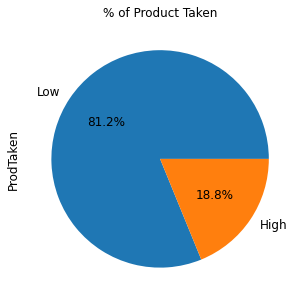

In [13]:
# Check penyebaran variabel target
ax = (df['ProdTaken'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['Low', 'High'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('ProdTaken',fontsize = 12)
ax.set_title('% of Product Taken', fontsize = 12)

In [18]:
# function to generate bar-plot with percentage
def generate_barplot(feature, lebar = 0.2):
  result = df.groupby([feature,'ProdTaken']).size().unstack()
  colors = ['#4D3425','#E4512B']
  ax = (result.T*100.0 / result.T.sum()).T.plot(kind='bar',
                                                            width = lebar ,
                                                            stacked = True,
                                                            rot = 0, 
                                                            figsize = (8,6),
                                                            color = colors)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())
  ax.legend(loc='center',prop={'size':14},title = 'Chance')
  ax.set_ylabel('% Customers')
  ax.set_title('Chance by ' + feature ,size = 14)

  # Code to add the data labels on the stacked bar chart
  for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                  color = 'white',
                weight = 'bold',size =14)

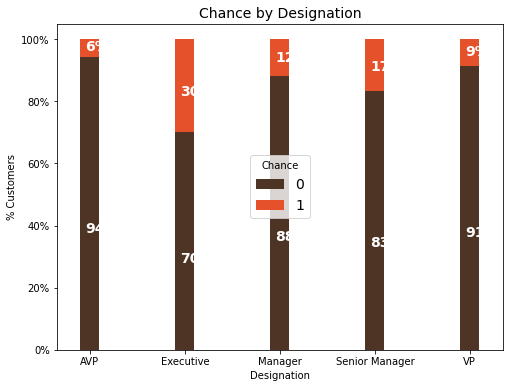

In [19]:
generate_barplot('Designation')

In [ ]:
generate_barplot()